### 数据预处理
 - 数据质量：缺失值处理、异常处理、重复数据
 - 数据结构：格式转化、数据合并

### 1. 删除重复数据，并输出去重前后的数据量
### 2. 缺失值处理
- 首先，去掉 gravatar_id 列，并查看各列的缺失值的情况
- 其次，将可转化成 boolean 变量的列字段转化成 boolean 变量（转成布尔类型是为了便于处理缺失字段，如是否存在公司、位置等等），文本数据用空字符串填充空值......
- 最后，再次看各列有无缺失值
### 3. 数据变换，将created_at、updated_at转为时间戳
### 4. 数据可视化
- 4.1 可视化bot和hunman类型的情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.2 可视化bot类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.3 可视化human类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.4 可视化bot类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.5 可视化human类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

In [3]:
import pandas as pd
raw_data = pd.read_csv('github_bot_raw_data.csv') 
#列字段解读
columns = [
    'actor_id',  # GitHub用户的ID (示例值: 1081405)
    'label',  # 用户标签（"Human"或"Bot"） (示例值: Human)
    'login',  # GitHub用户的登录名 (示例值: dlazesz)
    'id',  # 用户的GitHub ID (示例值: 1081405)
    'node_id',  # 用户的GitHub节点ID (示例值: MDQ6VXNlcjEwODE0MDU=)
    'avatar_url',  # GitHub头像URL (示例值: https://avatars.githubusercontent.com/u/1081405?v=4)
    'gravatar_id',  # Gravatar ID (示例值: None)
    'url',  # GitHub用户的URL (示例值: https://api.github.com/users/dlazesz)
    'html_url',  # GitHub用户的HTML URL (示例值: https://github.com/dlazesz)
    'followers_url',  # GitHub用户的粉丝URL (示例值: https://api.github.com/users/dlazesz/followers)
    'following_url',  # GitHub用户的关注URL (示例值: https://api.github.com/users/dlazesz/following{/other_user})
    'gists_url',  # 用户的GitHub Gists URL (示例值: https://api.github.com/users/dlazesz/gists{/gist_id})
    'starred_url',  # 用户的GitHub Starred URL (示例值: https://api.github.com/users/dlazesz/starred{/owner}{/repo})
    'subscriptions_url',  # 用户的GitHub订阅URL (示例值: https://api.github.com/users/dlazesz/subscriptions)
    'organizations_url',  # 用户的GitHub组织URL (示例值: https://api.github.com/users/dlazesz/orgs)
    'repos_url',  # 用户的GitHub仓库URL (示例值: https://api.github.com/users/dlazesz/repos)
    'events_url',  # 用户的GitHub事件URL (示例值: https://api.github.com/users/dlazesz/events{/privacy})
    'received_events_url',  # 用户的GitHub接收事件URL (示例值: https://api.github.com/users/dlazesz/received_events)
    'type',  # 用户类型，通常为"User" (示例值: User)
    'site_admin',  # 表示用户是否是GitHub网站管理员的标志 (示例值: False)
    'name',  # 用户的姓名 (示例值: Indig Balázs)
    'company',  # 用户所在公司 (示例值: None)
    'blog',  # 用户的博客 (示例值: None)
    'location',  # 用户的位置 (示例值: None)
    'email',  # 用户的电子邮件 (示例值: None)
    'hireable',  # 表示用户是否愿意被雇佣的标志 (示例值: None)
    'bio',  # 用户在其GitHub资料中提供的自我介绍或个人简介 (示例值: None)
    'twitter_username',  # 用户的Twitter用户名 (示例值: None)
    'public_repos',  # 用户在GitHub上的公共代码仓库数量 (示例值: 26)
    'public_gists',  # 用户的公共Gists数量 (示例值: 1)
    'followers',  # 关注该用户的其他GitHub用户数量 (示例值: 5)
    'following',  # 该用户关注的其他GitHub用户数量 (示例值: 1)
    'created_at',  # 用户的GitHub帐户创建日期 (示例值: 2011-09-26T17:27:03Z)
    'updated_at',  # 用户的GitHub帐户最后更新日期 (示例值: 2023-10-13T11:21:10Z)
]
data = raw_data[columns]

去重前数据量： 20358
去重后数据量： 19779
去掉gravatar_id列后各列缺失值情况：
actor_id                   0
label                      0
login                      0
id                         0
node_id                    0
avatar_url                 0
url                        0
html_url                   0
followers_url              0
following_url              0
gists_url                  0
starred_url                0
subscriptions_url          0
organizations_url          0
repos_url                  0
events_url                 0
received_events_url        0
type                       0
site_admin                 0
name                    2589
company                 8982
blog                   11263
location                7080
email                  11739
hireable               16481
bio                    10930
twitter_username       14859
public_repos               0
public_gists               0
followers                  0
following                  0
created_at                 0
updated_at          

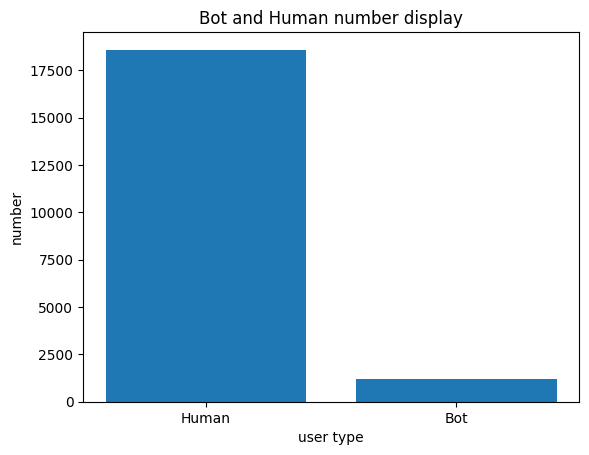

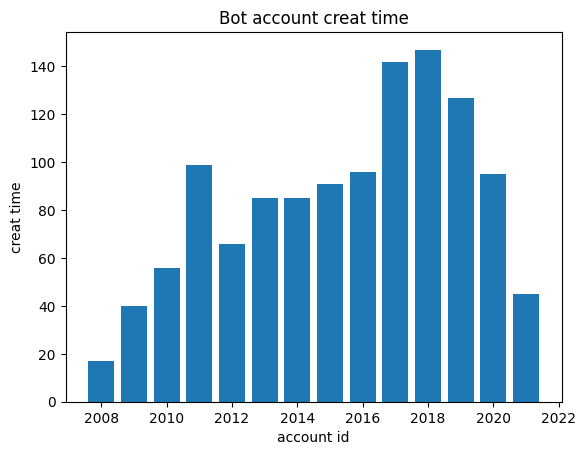

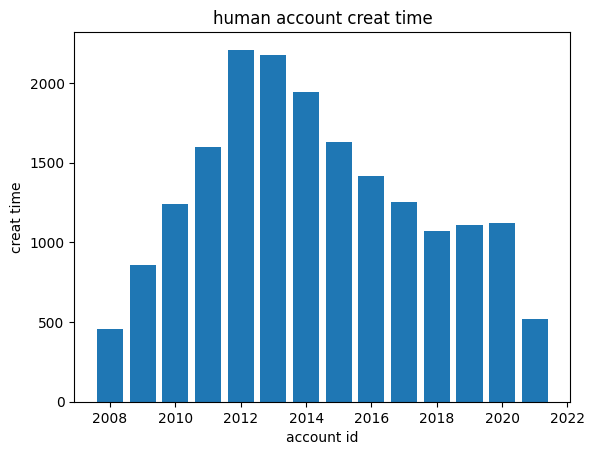

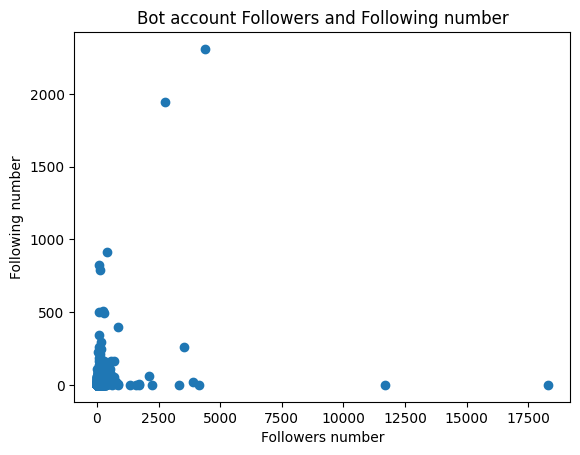

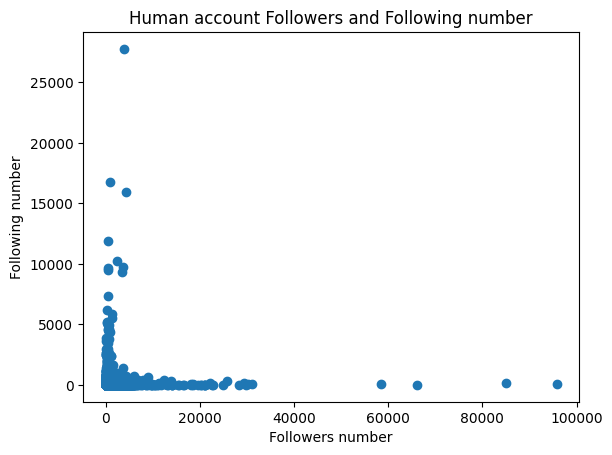

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

def read_data(file_path):
    raw_data = pd.read_csv(file_path)
    columns = [
        'actor_id',  # GitHub用户的ID (示例值: 1081405)
        'label',  # 用户标签（"Human"或"Bot"） (示例值: Human)
        'login',  # GitHub用户的登录名 (示例值: dlazesz)
        'id',  # 用户的GitHub ID (示例值: 1081405)
        'node_id',  # 用户的GitHub节点ID (示例值: MDQ6VXNlcjEwODE0MDU=)
        'avatar_url',  # GitHub头像URL (示例值: https://avatars.githubusercontent.com/u/1081405?v=4)
        'gravatar_id',  # Gravatar ID (示例值: None)
        'url',  # GitHub用户的URL (示例值: https://api.github.com/users/dlazesz)
        'html_url',  # GitHub用户的HTML URL (示例值: https://github.com/dlazesz)
        'followers_url',  # GitHub用户的粉丝URL (示例值: https://api.github.com/users/dlazesz/followers)
        'following_url',  # GitHub用户的关注URL (示例值: https://api.github.com/users/dlazesz/following{/other_user})
        'gists_url',  # 用户的GitHub Gists URL (示例值: https://api.github.com/users/dlazesz/gists{/gist_id})
        'starred_url',  # 用户的GitHub Starred URL (示例值: https://api.github.com/users/dlazesz/starred{/owner}{/repo})
        'subscriptions_url',  # 用户的GitHub订阅URL (示例值: https://api.github.com/users/dlazesz/subscriptions)
        'organizations_url',  # 用户的GitHub组织URL (示例值: https://api.github.com/users/dlazesz/orgs)
        'repos_url',  # 用户的GitHub仓库URL (示例值: https://api.github.com/users/dlazesz/repos)
        'events_url',  # 用户的GitHub事件URL (示例值: https://api.github.com/users/dlazesz/events{/privacy})
        'received_events_url',  # 用户的GitHub接收事件URL (示例值: https://api.github.com/users/dlazesz/received_events)
        'type',  # 用户类型，通常为"User" (示例值: User)
        'site_admin',  # 表示用户是否是GitHub网站管理员的标志 (示例值: False)
        'name',  # 用户的姓名 (示例值: Indig Balázs)
        'company',  # 用户所在公司 (示例值: None)
        'blog',  # 用户的博客 (示例值: None)
        'location',  # 用户的GitHub位置 (示例值: None)
        'email',  # 用户的电子邮件 (示例值: None)
        'hireable',  # 表示用户是否愿意被雇佣的标志 (示例值: None)
        'bio',  # 用户在其GitHub资料中提供的自我介绍或个人简介 (示例值: None)
        'twitter_username',  # 用户的Twitter用户名 (示例值: None)
        'public_repos',  # 用户在GitHub上的公共代码仓库数量 (示例值: 26)
        'public_gists',  # 用户的公共Gists数量 (示例值: 1)
        'followers',  # 关注该用户的其他GitHub用户数量 (示例值: 5)
        'following',  # 该用户关注的其他GitHub用户数量 (示例值: 1)
        'created_at',  # 用户的GitHub帐户创建日期 (示例值: 2011-09-26T17:27:03Z)
        'updated_at',  # 用户的GitHub帐户最后更新日期 (示例值: 2023-10-13T11:21-3T11:21:10Z)
    ]
    data = raw_data[columns]
    return data

def main():
    file_path='github_bot_raw_data.csv'
    data=read_data(file_path)

    # 1. 删除重复数据并输出去重前后的数据量
    print("去重前数据量：",len(data))
    data_unique=data.drop_duplicates()
    print("去重后数据量：",len(data_unique))

    # 2. 缺失值处理
    # 去掉gravatar_id列
    data_without_gravatar=data_unique.drop('gravatar_id',axis=1)
    print("去掉gravatar_id列后各列缺失值情况：")
    print(data_without_gravatar.isnull().sum())

    # 将可转化成boolean变量的列字段转化成boolean变量，文本数据用空字符串填充空值
    boolean_columns=['site_admin', 'hireable']
    for col in boolean_columns:
        data_without_gravatar[col]=data_without_gravatar[col].astype('bool')

    text_columns=['company', 'blog', 'location', 'email', 'bio', 'twitter_username']
    for col in text_columns:
        data_without_gravatar[col]=data_without_gravatar[col].fillna('')

    print("处理后各列缺失值情况：")
    print(data_without_gravatar.isnull().sum())

    # 3. 数据变换，将created_at、updated_at转为时间戳
    data_without_gravatar['created_at']=pd.to_datetime(data_without_gravatar['created_at'])
    data_without_gravatar['updated_at']=pd.to_datetime(data_without_gravatar['updated_at'])

    data_without_gravatar['created_at_timestamp']=data_without_gravatar['created_at'].astype('int64')//10**9
    data_without_gravatar['updated_at_timestamp']=data_without_gravatar['updated_at'].astype('int64')//10**9

    # 4. 数据可视化

    # 4.1 可视化bot和human类型的情况
    type_count=data_without_gravatar['label'].value_counts()

    plt.bar(type_count.index,type_count.values)
    plt.xlabel('user type')
    plt.ylabel('number')
    plt.title('Bot and Human number display')
    plt.show()

    # 4.2 可视化bot类型账号的created_at情况
    bot_data=data_without_gravatar[data_without_gravatar['label']=='Bot']
    bot_created_at=bot_data['created_at']
    bot_created_at_years = bot_created_at.dt.year
    bot_yearly_counts =bot_created_at_years.value_counts().sort_index()

    plt.bar(bot_yearly_counts.index, bot_yearly_counts.values)
    plt.xlabel('account id')
    plt.ylabel('creat time')
    plt.title('Bot account creat time')
    plt.show()
    
    # 4.3 可视化human类型账号的created_at情况
    human_data=data_without_gravatar[data_without_gravatar['label'] == 'Human']
    human_created_at = human_data['created_at']
    human_created_at_years = human_created_at.dt.year
    yearly_counts = human_created_at_years.value_counts().sort_index()

    plt.bar(yearly_counts.index, yearly_counts.values)
    plt.xlabel('account id')
    plt.ylabel('creat time')
    plt.title('human account creat time')
    plt.show()

    # 4.4 可视化bot类型账号的followers和following情况
    bot_followers_following=bot_data[['followers','following']]

    plt.scatter(bot_followers_following['followers'], bot_followers_following['following'])
    plt.xlabel('Followers number')
    plt.ylabel('Following number')
    plt.title('Bot account Followers and Following number')
    plt.show()

    # 4.5 可视化human类型账号的followers和following情况
    human_followers_following=human_data[['followers','following']]

    plt.scatter(human_followers_following['followers'],human_followers_following['following'])
    plt.xlabel('Followers number')
    plt.ylabel('Following number')
    plt.title('Human account Followers and Following number')
    plt.show()


if __name__ == "__main__":
    main()

## 4.1 可视化 bot 和 human 类型的情况
- ### 选择原因：
- 这里选择柱状图来展示 bot 和 human 类型的数量分布情况。柱状图能够清晰直观地对比不同类别（bot 和 human）的数量，便于观察两者之间的差异。
- ### 结果分析：
- 通过观察柱状图，可以清晰地看到 “bot” 和 “human” 类型在数据集中的数量对比。“bot” 类型对应的柱子明显高于 “human” 类型的柱子，“bot” 类型的账号数量更多。
- ### 数据洞悉：
- 从数据构成角度来看，了解到 “bot” 和 “human” 类型的比例关系，对于后续分析数据集中不同类型用户的行为特征具有重要意义。 “bot” 类型占比较大，那么在研究用户行为模式、交互情况等方面需要重点考虑 “bot” 类型的影响。这种比例信息还能反映出平台的用户生态情况，大量的 “bot” 可能暗示平台存在较多自动化操作的账号，这可能与平台的功能、运营策略或者安全状况相关。

## 4.2 可视化 bot 类型账号的 created_at 情况
- ### 选择原因：
- 选择柱状图来展示 bot 类型账号的创建时间分布情况。折线图适合展示随时间变化的数据趋势，能够清晰地呈现 bot 类型账号在不同时间点的创建情况。
- ### 结果分析：
- 柱状图中可以看出在2008-2018，bot账号总体呈上升趋势，在2018年bot账号创建量达到巅峰，之后数量回落。
- ### 数据洞悉：
- 在2008-2018年间，技术进步使得创建bot账号变得更加容易和高效；但18年后增长速度放缓，可能是受到了资源限制、竞争加剧等因素的影响。大量bot账号在短时间内的创建可能带来一些潜在风险，如平台信息真实性受到影响、对正常用户体验造成干扰等。通过对bot账号创建时间趋势的分析，平台可以及时发现这些潜在风险，并采取相应的措施，如加强账号审核、优化算法识别异常账号等，以维护平台的健康生态。

## 4.3 可视化 human 类型账号的 created_at 情况
- ### 选择原因：
- 同样选择柱状图来展示human类型账号的创建时间分布情况，理由与可视化bot类型账号的created_at情况类似。
- ### 结果分析：
- 柱状图中可以看出在2008-2012，human账号总体呈上升趋势，在2012年bot账号创建量达到巅峰，之后数量回落。12年左右可能是平台对人类用户吸引力较大的阶段，如开展了大规模推广活动、发布了热门功能等；谷值时期则可能是由于外部竞争、平台负面事件等因素导致用户注册减少。
- ### 数据洞悉：
- 早期用户创建数量较少，随着平台的发展逐渐增多，可分析出平台在不同阶段对人类用户的吸引力变化。12年后用户可能逐渐饱和。这对于平台优化运营策略、改进推广方式等具有指导意义。

## 4.4 可视化 bot 类型账号的 followers 和 following 情况
- ### 选择原因：
- 选择散点图来展示 bot 类型账号的 followers 和 following 数量关系。散点图可以直观地展示两个变量（followers 和 following）之间的关系，有助于发现两者之间是否存在某种关联模式。
- ### 结果分析：
- bot类账号普遍粉丝量较少，且相当一部分following number大于followers number
- ### 数据洞悉：
- 部分 “bot” 账号的散点集中在特定区域，意味着这些 “bot” 具有相似的社交策略，比如可能是为了增加信息传播而大量关注其他账号，或者是为了营造虚假的人气而获取大量粉丝。这种行为模式对于平台的社交生态和信息传播分析至关重要。

## 4.5 可视化 human 类型账号的 followers 和 following 情况
- ### 选择原因：
- 同样选择散点图来展示 human 类型账号的 followers 和 following 数量关系，理由与可视化 bot 类型账号的 followers 和 following 情况类似。
- ### 结果分析：
- 可以看出一部分human账号粉丝量和关注量都偏极端，要么粉丝量极多，要么关注者极多。
- ### 数据洞悉：
- 通过对散点图的分析，深入了解人类用户的社交互动模式。这可以为平台设计社交推荐算法提供依据，即可以考虑推荐用户关注那些与他们关注行为相似的其他用户，以提高用户的社交体验和平台的活跃度。